In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv('/home/soumyab/Downloads/Dataset/TimeSeries_coursedata_kaggle/book_sales.csv',
                index_col='Date',
                parse_dates=['Hardcover'],
                ).drop('Paperback', axis=1)
df.head()

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191


In [16]:
type(df.Hardcover)

pandas.core.series.Series

In [17]:
df1 = pd.read_csv('/home/soumyab/Downloads/Dataset/TimeSeries_coursedata_kaggle/book_sales.csv')
df1.head()

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


Two features are there in time series: time-step features and lag features

In [50]:
df['Time'] = np.arange(len(df.index))
df.head()

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4


In [ ]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots()
ax.plot('Time', 'Hardcover', data=df, color='0.75')
ax = sns.regplot(x='Time', y='Hardcover', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_title('Time Plot of Hardcover Sales');

In [ ]:
sns.regplot?

In [73]:
df2 = df1.drop('Paperback', axis=1)
df2.head()

,Date,Hardcover
0,2000-04-01,139
1,2000-04-02,128
2,2000-04-03,172
3,2000-04-04,139
4,2000-04-05,191


<AxesSubplot:>

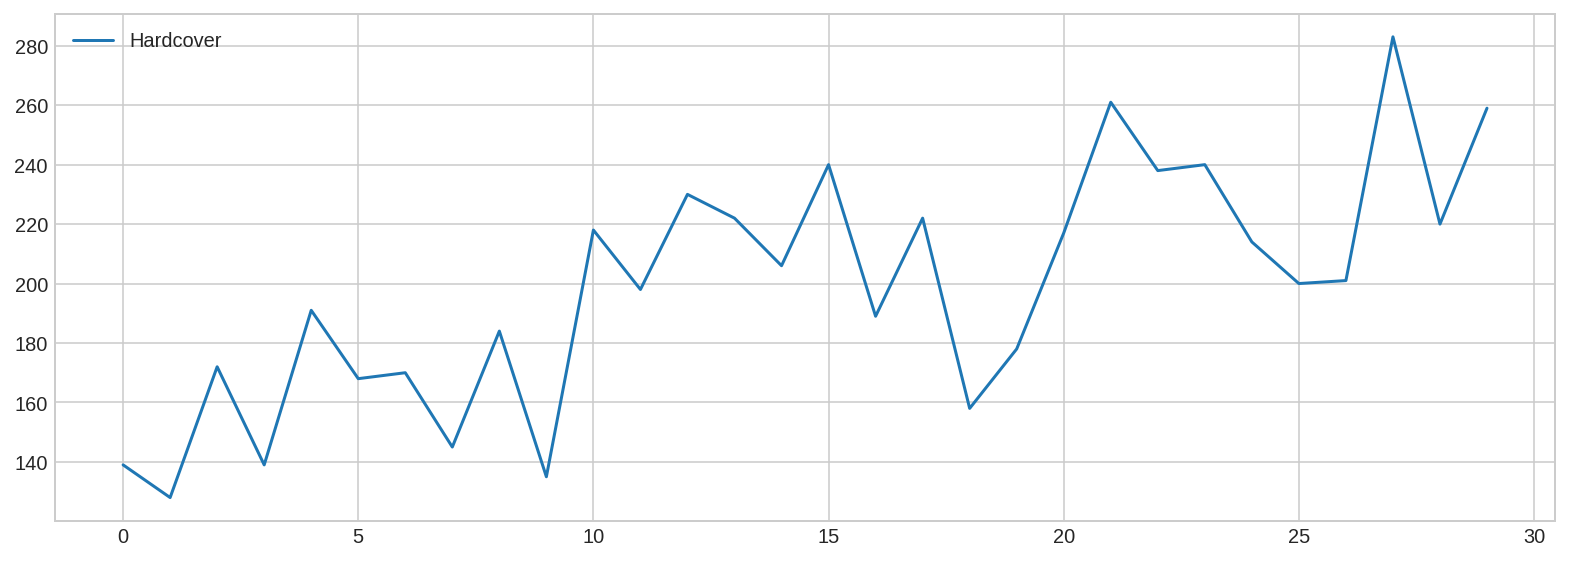

In [74]:
df2.plot()

In [75]:
df['lag_1'] = df.Hardcover.shift(1)
df.head()

,Hardcover,Time,lag_1
Date,,,
2000-04-01,139,0,NaN
2000-04-02,128,1,139
2000-04-03,172,2,128
2000-04-04,139,3,172
2000-04-05,191,4,139


In [79]:
df = df.reindex(columns=['Hardcover', 'lag_1'])
df.head()

,Hardcover,lag_1
Date,,
2000-04-01,139,NaN
2000-04-02,128,139
2000-04-03,172,128
2000-04-04,139,172
2000-04-05,191,139


UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U3'), dtype('float64')) -> None

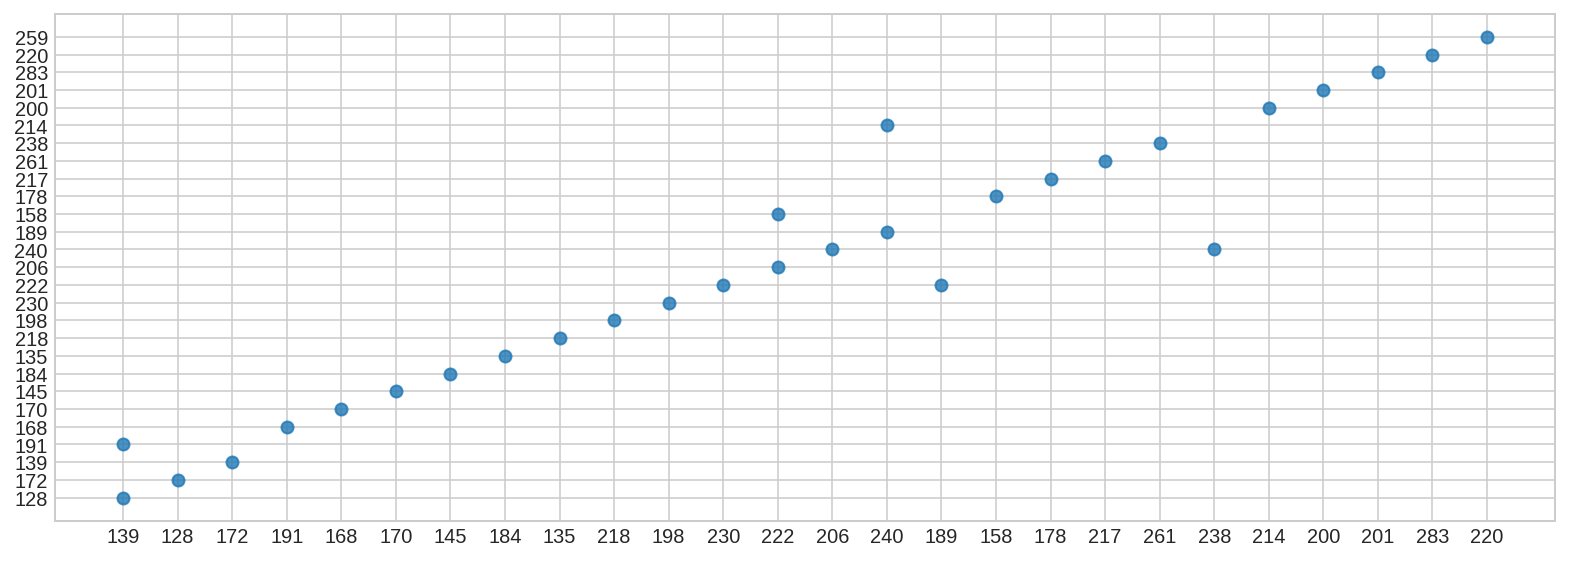

In [87]:
ax = sns.regplot(x='lag_1', y='Hardcover', data=df, ci=None)
ax.set_title('Lag plot');